In [2]:
# Importing necessary libraries for data manipulation
import pandas as pd
import numpy as np 

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Ensures that graphs are displayed inline in the Jupyter Notebook
%matplotlib inline



### Setting Up the Environment for Data Analysis, Visualization, and Machine Learning

#### Libraries and Modules Used:

- **Data Analysis and Wrangling**:
  - **`numpy`**: Provides support for efficient numerical computation, essential for handling large data arrays and matrices.
  - **`pandas`**: Offers data structures and operations for manipulating numerical tables and time series. It is fundamental for data cleaning, preparation, and analysis tasks.

- **Visualization Tools**:
  - **`seaborn`**: A Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive statistical graphics.
  - **`matplotlib.pyplot`**: A collection of functions that make matplotlib work like MATLAB. It is used to create figures and plots for data visualization.
  - **`%matplotlib inline`**: A magic function in Jupyter Notebook that renders figures directly below the code cell that produced them. The figures are stored in the notebook document.


In [4]:
movies_df = pd.read_csv("movies.csv")
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings_df =pd.read_csv("ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
movies_df.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [7]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [8]:
missing_values_in_movies_df = movies_df.isnull().sum()
print(missing_values_in_movies_df)

movieId    0
title      0
genres     0
dtype: int64


In [9]:
missing_values_in_ratings_df = ratings_df.isnull().sum()
print(missing_values_in_ratings_df)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


### Number of movies and users

In [11]:
num_movies =ratings_df['movieId'].nunique()
print("Number of unique movies:",num_movies)
num_users = ratings_df['userId'].nunique()
print("Number of unique users:", num_users)

Number of unique movies: 9724
Number of unique users: 610


### Ratings per movie 

In [13]:
ratings_per_movies = ratings_df['movieId'].value_counts()
ratings_per_movies.head(10)


movieId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: count, dtype: int64

### Visualize  movie ratings distribution

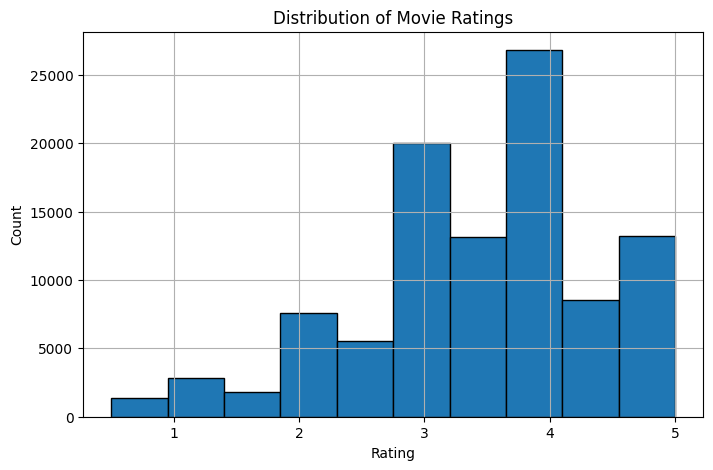

In [15]:
plt.figure(figsize=(8,5))
ratings_df['rating'].hist(bins=10,  edgecolor='black')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Distribution of Movie Ratings")
plt.show()

### Genre Analysis

{'Romance', 'Film-Noir', 'Comedy', 'Children', 'Horror', 'Animation', 'Sci-Fi', 'Drama', '(no genres listed)', 'Action', 'Thriller', 'Documentary', 'Crime', 'War', 'IMAX', 'Mystery', 'Western', 'Fantasy', 'Adventure', 'Musical'}
genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


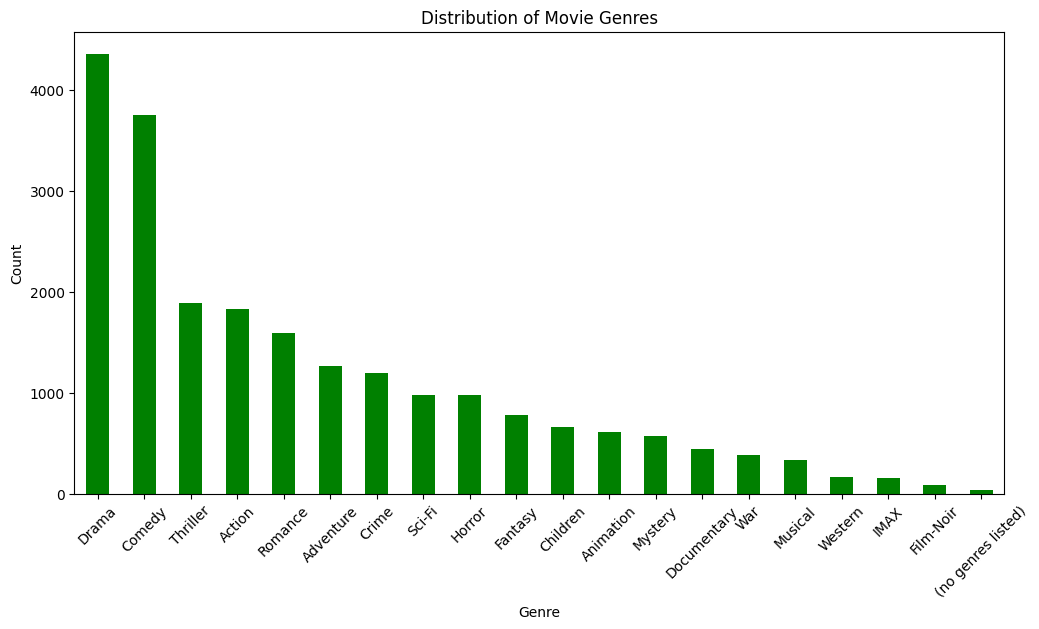

In [17]:
unique_genres =set(genre for genres in movies_df['genres'].str.split('|') for genre in genres)
print(unique_genres)
genre_counts = movies_df['genres'].str.split('|').explode().value_counts()
print(genre_counts)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='green')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Movie Genres")
plt.xticks(rotation=45)
plt.show()

- From the above bar chart , we can see that there is one category called 'no genres listed' in the list of genres .
- We will remove the movies without genre information later.

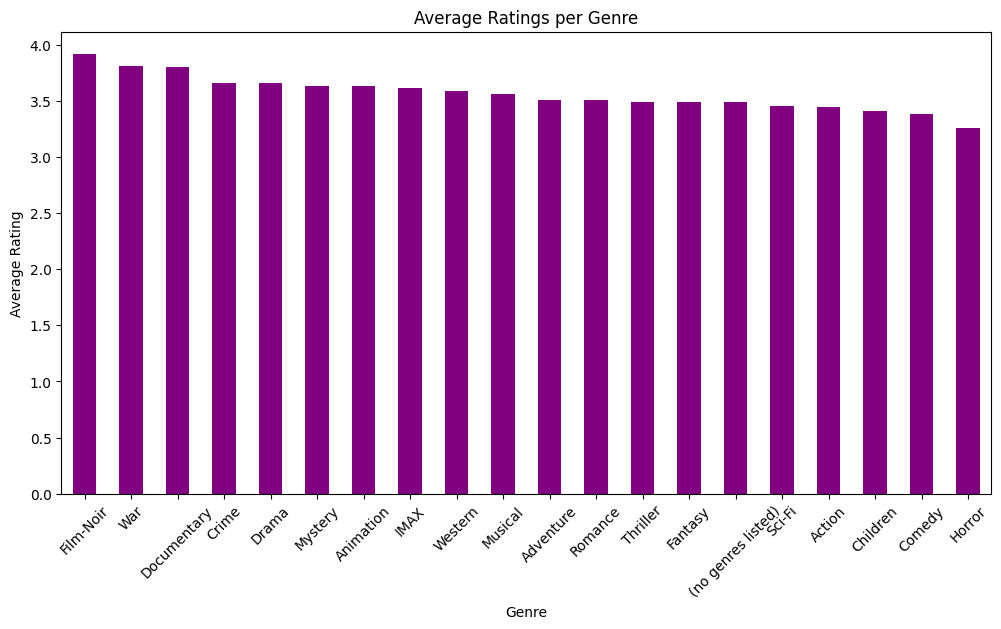

In [19]:
merged_df = pd.merge(ratings_df , movies_df , on='movieId' )
merged_df['genres'] =merged_df['genres'].str.split('|')
exploded_df = merged_df.explode('genres')
genre_avg_ratings = exploded_df.groupby('genres')['rating'].mean().sort_values(ascending=False)
genre_avg_ratings

plt.figure(figsize=(12,6))
genre_avg_ratings.plot(kind='bar', color='purple')
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Ratings per Genre")
plt.xticks(rotation=45)
plt.show()

### Average ratings per genre 

### Top 10 movies as per the average ratings given by user

In [22]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean()
average_ratings_df = movies_df.merge(average_ratings, on= 'movieId')
movie_counts = ratings_df['movieId'].value_counts()
filtered_movies = average_ratings_df[movies_df['movieId'].isin(movie_counts[movie_counts >= 50].index)]
top_movies = filtered_movies.sort_values(by='rating', ascending=False).head(10)
top_movies.head()

/var/folders/04/hj7m_hs56ls5zqfdq0x332kc0000gn/T/ipykernel_9352/2395751377.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_movies = average_ratings_df[movies_df['movieId'].isin(movie_counts[movie_counts >= 50].index)]


,movieId,title,genres,rating
8691,124851,Delirium (2014),Adventure|Romance|Sci-Fi,5.00
1005,1310,Hype! (1996),Documentary,5.00
3903,5490,The Big Bus (1976),Action|Comedy,5.00
7258,74727,Gentlemen of Fortune (Dzhentlmeny udachi) (1972),Comedy|Crime|Drama|Mystery,4.75
6151,44633,"Devil and Daniel Johnston, The (2005)",Documentary,4.50


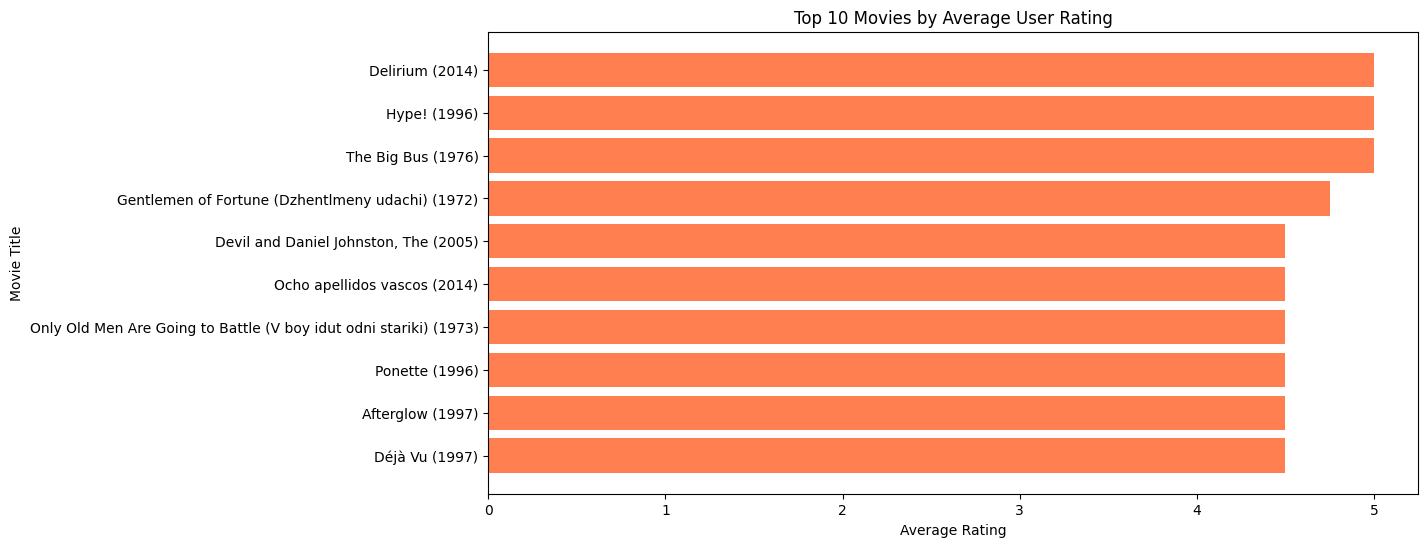

In [23]:
plt.figure(figsize=(12,6))
plt.barh(top_movies['title'],top_movies['rating'], color='coral')
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Average User Rating")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

### Data preprocessing

- As we have seen in the above section , there are no missing values in the movies_df and ratings_df. The dataset is clean .
- Remove **'|'** from the genres column.
- We need to remove the **'no genres listed'** genre type from the genres as movies without genre information will not be useful in further analysis.
- Genre type **'Sci-Fi'** and **'Film-Noir'** contains **'-'**,which will result in considering it as two different words while using TF-IDF vectorizer. So '-' needds to be removed .
- **IMAX** is not a genre. It's a viewing feature.So it needs to be removed.

In [26]:
r,c = movies_df[movies_df['genres']=='(no genres listed)'].shape
print('The number of movies which do not have info about genres:',r)

The number of movies which do not have info about genres: 34


In [27]:
# remove the movies without genre information and reset the index
movies_df = movies_df[~(movies_df['genres']=='(no genres listed)')].reset_index(drop=True)

In [28]:
# remove '|' in the genres column
movies_df['genres'] = movies_df['genres'].str.replace('|',' ')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,2,Jumanji (1995),Adventure Children Fantasy
2,3,Grumpier Old Men (1995),Comedy Romance
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy


In [29]:
# change 'Sci-Fi' to 'SciFi' and 'Film-Noir' to 'Noir'
movies_df['genres'] = movies_df['genres'].str.replace('Sci-Fi', 'SciFi')
movies_df['genres'] = movies_df['genres'].str.replace('Film-Noir', 'FilmNoir')


In [30]:
sci_fi_movies = movies_df[movies_df['genres'].str.contains("SciFi", case=False, na=False)]
sci_fi_movies.head()


,movieId,title,genres
23,24,Powder (1995),Drama SciFi
28,29,"City of Lost Children, The (Cité des enfants p...",Adventure Drama Fantasy Mystery SciFi
31,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery SciFi Thriller
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),Action SciFi Thriller
68,76,Screamers (1995),Action SciFi Thriller


In [31]:
film_noir_movies =  movies_df[movies_df['genres'].str.contains("FilmNoir", case=False, na=False)]
(film_noir_movies.head())

,movieId,title,genres
137,164,Devil in a Blue Dress (1995),Crime FilmNoir Mystery Thriller
279,320,Suture (1993),FilmNoir Thriller
305,347,Bitter Moon (1992),Drama FilmNoir Romance
695,913,"Maltese Falcon, The (1941)",FilmNoir Mystery
704,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama FilmNoir Romance


In [32]:
imax = movies_df[movies_df['genres'].str.contains("IMAX", case=False, na=False)]
imax.head()

,movieId,title,genres
123,150,Apollo 13 (1995),Adventure Drama IMAX
322,364,"Lion King, The (1994)",Adventure Animation Children Drama Musical IMAX
512,595,Beauty and the Beast (1991),Animation Children Fantasy Musical Romance IMAX
1328,1797,Everest (1998),Documentary IMAX
2381,3159,Fantasia 2000 (1999),Animation Children Musical IMAX


In [33]:
# Remove 'IMAX' from the genres column while keeping other genres
movies_df['genres'] = movies_df['genres'].str.replace(r'\bIMAX\b', '', regex=True).str.strip()

#Remove extra spaces that may appear after removal
movies_df['genres'] = movies_df['genres'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [34]:
imax = movies_df[movies_df['genres'].str.contains("IMAX", case=False, na=False)]
imax.head()

,movieId,title,genres


## Content Based Filtering Approach

### TF-IDF
**TF-IDF vectorizer gives less importance to common words and more importance to rare but meaningful words.**

**Term Frequency (TF):** Measures how frequently a word appears in a document.
\\[
TF(t, d) = \frac{\text{Number of times word appears in a document}}{\text{Total words in the document}}
\\]

**Inverse Document Frequency (IDF):** Measures the importance of a word by reducing the weight of common words.

\\[
IDF(t) = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents containing the word}} \right)
\\]

**TF-IDF Score Formula:**
\\[
TFIDF(t, d) = TF(t, d) \times IDF(t)
\\]

**tfidf_df**
- Each row represents a movie.
- Each column represents a genre keyword (e.g., "Action", "Comedy", "Drama").
- Values (TF-IDF scores) measure the importance of each genre for a movie.



In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create an object for TfidfVectorizer
tfidf_vector = TfidfVectorizer(stop_words='english')

# apply the object to the genres column
tfidf_matrix = tfidf_vector.fit_transform(movies_df['genres'])


In [38]:
tfidf_matrix.shape

(9708, 18)

In [39]:
# Store feature names
feature_names = tfidf_vector.get_feature_names_out()
print(feature_names)

['action' 'adventure' 'animation' 'children' 'comedy' 'crime'
 'documentary' 'drama' 'fantasy' 'filmnoir' 'horror' 'musical' 'mystery'
 'romance' 'scifi' 'thriller' 'war' 'western']


In [40]:
# Convert TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vector.get_feature_names_out(), index=movies_df['title'])
tfidf_df.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,musical,mystery,romance,scifi,thriller,war,western
title,,,,,,,,,,,,,,,,,,
Toy Story (1995),0.0,0.416804,0.516288,0.504896,0.267388,0.0,0.0,0.000000,0.483017,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Jumanji (1995),0.0,0.512293,0.000000,0.620567,0.000000,0.0,0.0,0.000000,0.593677,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.000000,0.000000,0.000000,0.570705,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.821155,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.000000,0.000000,0.000000,0.504886,0.0,0.0,0.466216,0.000000,0.0,0.0,0.0,0.0,0.726452,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [41]:
movie_tfidf_values = tfidf_df.loc["Toy Story (1995)"]
movie_tfidf_values

action         0.000000
adventure      0.416804
animation      0.516288
children       0.504896
comedy         0.267388
crime          0.000000
documentary    0.000000
drama          0.000000
fantasy        0.483017
filmnoir       0.000000
horror         0.000000
musical        0.000000
mystery        0.000000
romance        0.000000
scifi          0.000000
thriller       0.000000
war            0.000000
western        0.000000
Name: Toy Story (1995), dtype: float64

### Cosine Similarity

- The sim_matrix created using linear_kernel() is a cosine similarity matrix that measures how similar each movie is to every other movie based on their TF-IDF genre representation.
- Each row & column of a sim_matrix represents a movie.
- Diagonal values (sim_matrix[i][i]) are always 1 → A movie is 100% similar to itself.
- Higher values (closer to 1) mean strong similarity, while lower values (closer to 0) mean less similarity.


In [43]:
from sklearn.metrics.pairwise import linear_kernel

# create the cosine similarity matrix
sim_matrix = linear_kernel(tfidf_matrix,tfidf_matrix) 
(sim_matrix)

array([[1.        , 0.8136036 , 0.15259961, ..., 0.        , 0.42114166,
        0.26738778],
       [0.8136036 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15259961, 0.        , 1.        , ..., 0.        , 0.        ,
        0.57070525],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.42114166, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.26738778, 0.        , 0.57070525, ..., 0.        , 0.        ,
        1.        ]])

#### Check Similarity for a Specific Movie



In [45]:
sim_matrix_df = pd.DataFrame(sim_matrix, index=movies_df['title'], columns=movies_df['title'])

# Show similarities for "Toy Story"
print(sim_matrix_df.loc["Toy Story (1995)"].sort_values(ascending=False).head(10))

title
Toy Story (1995)                                                1.0
Adventures of Rocky and Bullwinkle, The (2000)                  1.0
Shrek Forever After (a.k.a. Shrek: The Final Chapter) (2010)    1.0
Toy Story 3 (2010)                                              1.0
Monsters, Inc. (2001)                                           1.0
Moana (2016)                                                    1.0
Antz (1998)                                                     1.0
Asterix and the Vikings (Astérix et les Vikings) (2006)         1.0
Wild, The (2006)                                                1.0
The Good Dinosaur (2015)                                        1.0
Name: Toy Story (1995), dtype: float64


In [46]:
# Get the most similar movie for each movie
most_similar_movies = sim_matrix_df.apply(lambda row: row.nlargest(2).idxmin(), axis=1)
print(most_similar_movies)


title
Toy Story (1995)                                                              Toy Story (1995)
Jumanji (1995)                                                                  Jumanji (1995)
Grumpier Old Men (1995)                                                Grumpier Old Men (1995)
Waiting to Exhale (1995)                                              Waiting to Exhale (1995)
Father of the Bride Part II (1995)                          Father of the Bride Part II (1995)
                                                                   ...                        
Black Butler: Book of the Atlantic (2017)             Dante's Inferno: An Animated Epic (2010)
No Game No Life: Zero (2017)                                                 Monkeybone (2001)
Flint (2017)                                                                      Nixon (1995)
Bungo Stray Dogs: Dead Apple (2018)          Street Fighter II: The Animated Movie (Sutorît...
Andrew Dice Clay: Dice Rules (1991)         

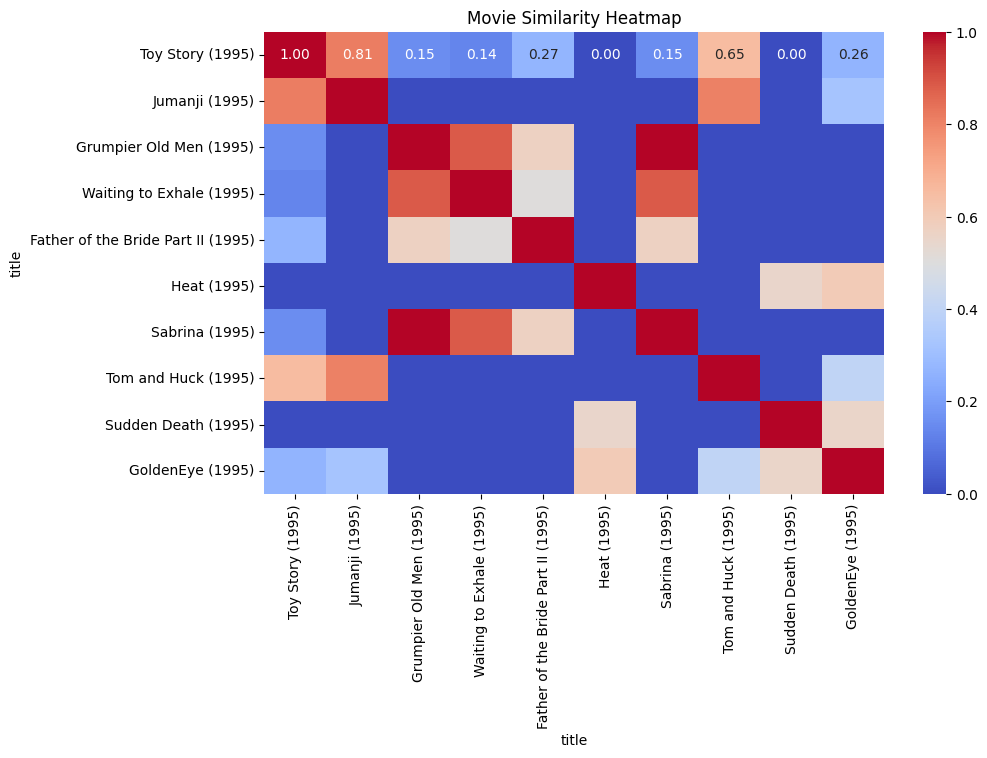

In [47]:

# Plot a heatmap of similarities
plt.figure(figsize=(10,6))
sns.heatmap(sim_matrix_df.iloc[:10, :10], cmap="coolwarm", annot=True, fmt=".2f")  # Show top 10 movies
plt.title("Movie Similarity Heatmap")
plt.show()

### Content based recommender

- The sim_matrix stores similarity scores based on index values.
To get recommendations, we find a movie's index and retrieve its similar movies using indices.
- Users input movie titles, but similarity computations require indices.
These functions bridge the gap.

In [50]:
# a function to convert index to title
def get_title_from_index(index):
   return movies_df[movies_df.index == index]['title'].values[0]

# a function to convert title to index
def get_index_from_title(title):
   return movies_df[movies_df.title == title].index.values[0]


In [51]:
def contents_based_recommender(movie_user_likes, recommend_num):
      movie_index = get_index_from_title(movie_user_likes) 
      movie_list = list(enumerate(sim_matrix[int(movie_index)]))
      # remove the typed movie itself
      similar_movies = list(filter(lambda x:x[0] != int(movie_index), sorted(movie_list,key=lambda x:x[1], reverse=True))) 
      print("List of similar movies:")
      for i,s in similar_movies[:recommend_num]:
         print(get_title_from_index(i))
 

In [52]:
contents_based_recommender('Toy Story (1995)',5)

List of similar movies:
Antz (1998)
Toy Story 2 (1999)
Adventures of Rocky and Bullwinkle, The (2000)
Emperor's New Groove, The (2000)
Monsters, Inc. (2001)


### How to evaluate content based recommender?

### Collaborative Filtering Approach (Model Based)
This model implements **Collaborative Filtering** using **Singular Value Decomposition (SVD)** for movie recommendations. It predicts **user-movie ratings** based on past interactions.

Ratings are normalized by applying **mean-centering** to remove user bias.

#### **Apply Singular Value Decomposition (SVD)**
Factorize the **User-Item matrix**:
   \\[
   R \approx U \cdot \Sigma \cdot V^T
   \\]
   - **U** → User feature matrix
   - **Σ** → Singular values (importance of features)
   - **Vᵀ** → Movie feature matrix
- Reconstruct the full matrix (predicted_ratings) to estimate missing ratings:  **predicted_ratings = np.dot(np.dot(U, sigma), Vt)**
Predict Ratings**
#### **Predict Ratings**
- Compute **predicted ratings** for user-movie pairs.
- Predicted ratings are clipped to fall within a **valid range (1-5)**.


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, accuracy_score

# Load dataset
ratings_matrix = ratings_df.pivot(index='userId', columns='movieId', values='rating')

#print(ratings_matrix)
#print("*********")
# Fill NaN with 0 (or use mean imputation)
ratings_matrix.fillna(0, inplace =True)

# Fill na with users average rating
#ratings_matrix = ratings_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

# Convert DataFrame to NumPy array
ratings_matrix_np = ratings_matrix.values

# Train-test split (80% training, 20% testing)
train_data, test_data = train_test_split(ratings_df, train_size=0.8,test_size=0.2, random_state=42)

ratings_matrix_mean = ratings_matrix.mean(axis=1)  # Get mean rating per user
normalized_matrix = ratings_matrix.sub(ratings_matrix_mean, axis=0).fillna(0)  # Normalize

# Apply SVD (reduce to k latent features)
k = 150  # Number of latent features
U, sigma, Vt = svds(ratings_matrix_np, k=k)
sigma = np.diag(sigma)  # Convert singular values into diagonal matrix

# Reconstruct the ratings matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert back to DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=ratings_matrix.index, columns=ratings_matrix.columns)
print(predicted_ratings_df.head())

movieId    1         2         3         4         5         6         7       \
userId                                                                          
1        5.108127 -0.284627  3.961226  0.077172  0.152845  4.159199  0.442984   
2        0.070494  0.192686  0.040368 -0.015871  0.037873 -0.023152  0.032543   
3        0.104445  0.057161  0.005507  0.007799  0.116943  0.346965  0.094246   
4       -0.641239 -0.658799 -0.332289  0.067692 -0.266578 -0.178404  0.894029   
5        2.419218  0.632037 -0.191199  0.025191  0.080091  0.145928  0.374332   

movieId    8         9         10      ...    193565    193567    193571  \
userId                                 ...                                 
1       -0.102314 -0.268985  0.003657  ... -0.026704 -0.022889 -0.030519   
2        0.057201 -0.127376  0.130527  ...  0.097262  0.083368  0.111157   
3       -0.006715  0.025228  0.109058  ... -0.003644 -0.003123 -0.004165   
4       -0.133180 -0.580008  0.964683  ... -0.004362

In [56]:
predicted_ratings_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,5.108127,-0.284627,3.961226,0.077172,0.152845,4.159199,0.442984,-0.102314,-0.268985,0.003657,...,-0.026704,-0.022889,-0.030519,-0.030519,-0.026704,-0.030519,-0.026704,-0.026704,-0.026704,0.017943
2,0.070494,0.192686,0.040368,-0.015871,0.037873,-0.023152,0.032543,0.057201,-0.127376,0.130527,...,0.097262,0.083368,0.111157,0.111157,0.097262,0.111157,0.097262,0.097262,0.097262,0.059579
3,0.104445,0.057161,0.005507,0.007799,0.116943,0.346965,0.094246,-0.006715,0.025228,0.109058,...,-0.003644,-0.003123,-0.004165,-0.004165,-0.003644,-0.004165,-0.003644,-0.003644,-0.003644,-0.003749
4,-0.641239,-0.658799,-0.332289,0.067692,-0.266578,-0.178404,0.894029,-0.133180,-0.580008,0.964683,...,-0.004362,-0.003739,-0.004986,-0.004986,-0.004362,-0.004986,-0.004362,-0.004362,-0.004362,0.095887
5,2.419218,0.632037,-0.191199,0.025191,0.080091,0.145928,0.374332,0.096420,-0.167956,0.532655,...,0.006123,0.005248,0.006997,0.006997,0.006123,0.006997,0.006123,0.006123,0.006123,0.040168


In [57]:
max_value = predicted_ratings_df.max().max()
print(f"Maximum Predicted Rating: {max_value}")

min_value = predicted_ratings_df.min().min()
print(f"Minunimum Predicted Rating: {min_value}")

Maximum Predicted Rating: 7.92338389742851
Minunimum Predicted Rating: -2.5253373879215113


Normalize ratings

In [59]:
predicted_ratings_df = predicted_ratings_df.clip(lower=1, upper=5)
max_value = predicted_ratings_df.max().max()
print(f"Maximum Predicted Rating: {max_value}")

min_value = predicted_ratings_df.min().min()
print(f"Minunimum Predicted Rating: {min_value}")
predicted_ratings_df.head()

Maximum Predicted Rating: 5.0
Minunimum Predicted Rating: 1.0


movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,5.000000,1.0,3.961226,1.0,1.0,4.159199,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2.419218,1.0,1.000000,1.0,1.0,1.000000,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**recommend_movies()** function recommends the top N movies to a specified user based on predicted ratings generated by the Singular Value Decomposition (SVD) collaborative filtering method.

In [61]:
def recommend_movies(user_id, ratings_matrix, predicted_ratings_df, movies_df, num_recommendations=5):
    """
    Recommend top N movies for a given user based on predicted ratings.

    Fixes:
    - Correctly identifies unrated movies.
    - Ensures `movieId` types match correctly.
    - If the user has rated all movies, still recommends best predictions.
    """
    if user_id not in ratings_matrix.index:
        print(f"User ID {user_id} not found in dataset!")
        return pd.DataFrame()

    # Step 1: Get movies the user has already rated
    # Step 1: Get movies the user has already rated (excluding zero ratings)
    rated_movies = set(ratings_matrix.loc[user_id][ratings_matrix.loc[user_id] > 0].dropna().index)

    print(f"User {user_id} has rated {len(rated_movies)} movies.")

    # Step 2: Get predicted ratings for the user
    if user_id not in predicted_ratings_df.index:
        print(f"No predictions found for User ID {user_id}.")
        return pd.DataFrame()

    user_predictions = predicted_ratings_df.loc[user_id]
    print(f"Total predicted movies before filtering: {len(user_predictions)}")

    # Step 3: Ensure `movieId` data types match to prevent filtering issues
    user_predictions.index = user_predictions.index.astype(int)
    movies_df['movieId'] = movies_df['movieId'].astype(int)

    # Step 4: Identify unrated movies correctly
    unrated_movies = set(user_predictions.index) - rated_movies
    print(f"Unrated movies found: {len(unrated_movies)}")

    if unrated_movies:
        # Recommend only unrated movies
        user_predictions_filtered = user_predictions.loc[list(unrated_movies)]
    else:
        # If the user has rated all movies, recommend their top predicted movies instead
        print("User has rated most movies! Recommending best predictions instead.")
        user_predictions_filtered = user_predictions

    # Step 5: Get top recommendations
    recommended_movies = user_predictions_filtered.sort_values(ascending=False).head(num_recommendations)

    # Step 6: Merge with movie details
    recommended_movies_df = movies_df[movies_df['movieId'].isin(recommended_movies.index)].copy()
    recommended_movies_df['Predicted Rating'] = recommended_movies.loc[recommended_movies_df['movieId']].values

    return recommended_movies_df[['title', 'genres', 'Predicted Rating']]

In [62]:
recommendations_for_user_2 = recommend_movies(2, ratings_matrix, predicted_ratings_df, movies_df, 5)
recommendations_for_user_2

User 2 has rated 29 movies.
Total predicted movies before filtering: 9724
Unrated movies found: 9695


,title,genres,Predicted Rating
1939,"Matrix, The (1999)",Action SciFi Thriller,1.096522
5917,Batman Begins (2005),Action Crime,1.057682
6331,"Prestige, The (2006)",Drama Mystery SciFi Thriller,1.159851
7413,"Social Network, The (2010)",Drama,1.059062
9522,War for the Planet of the Apes (2017),Action Adventure Drama SciFi,1.000000


In [63]:
recommendations_for_user_10 =recommend_movies(10, ratings_matrix, predicted_ratings_df, movies_df, 5)
recommendations_for_user_10

User 10 has rated 140 movies.
Total predicted movies before filtering: 9724
Unrated movies found: 9584


,title,genres,Predicted Rating
3614,Ocean's Eleven (2001),Crime Thriller,1.869171
3854,"Bourne Identity, The (2002)",Action Mystery Thriller,2.034326
4427,Pirates of the Caribbean: The Curse of the Bla...,Action Adventure Comedy Fantasy,1.818394
6220,"Devil Wears Prada, The (2006)",Comedy Drama,2.056986
8023,Silver Linings Playbook (2012),Comedy Drama,1.889827


### Model Evaluation

In [65]:
# Function to predict ratings for a user-movie pair
def predict_rating(user, movie):
    if movie in predicted_ratings_df.columns and user in predicted_ratings_df.index:
        return predicted_ratings_df.loc[user, movie]
    else:
        return np.nan  # Handle missing cases

# Prepare ground truth and predictions
y_actual = []
y_pred = []

for _, row in test_data.iterrows():
    actual_rating = row['rating']
    predicted_rating = predict_rating(row['userId'], row['movieId'])

    if not np.isnan(predicted_rating): # Ignore cases where prediction is missing
        y_actual.append(actual_rating)
        y_pred.append(predicted_rating)


In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Convert to NumPy arrays
y_actual = np.array(y_actual)
y_pred = np.array(y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse}")

# Compute MAE
mae = mean_absolute_error(y_actual, y_pred)
print(f"MAE: {mae}")


RMSE: 1.1898040698003396
MAE: 0.7176488557679722


## Hybrid Filtering Approach (Not final , still working on it)